In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the dataset
df = pd.read_excel('/content/CIP_01_05_2023_to_08_06_2023_granular data main.xlsx')
df.head()

,Date,Time,Totalizer,Unnamed: 3,Consumption
0,01/05/2023,00:00:25,21510.05,NaN,0.64
1,01/05/2023,00:05:23,21510.69,NaN,0.72
2,01/05/2023,00:10:25,21511.41,NaN,0.69
3,01/05/2023,00:15:25,21512.10,NaN,0.55
4,01/05/2023,00:20:26,21512.65,NaN,0.52


# **Data Preproccessing**

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Totalizer,0
Unnamed: 3,10872
Consumption,0


In [ ]:
df.drop(columns=['Unnamed: 3'], inplace=True)

In [ ]:
df.dtypes

,0
Date,object
Time,object
Totalizer,float64
Consumption,float64


In [ ]:
#Convert 'Date' and 'Time' to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(columns=['Date', 'Time'], inplace=True)

# **Exploratory Data Analysis**

In [ ]:
df.shape

(10872, 3)

In [ ]:
df.describe()
df.info()

,Totalizer,Consumption,DateTime
count,10872.000000,10872.000000,10872
mean,22373.671806,0.158887,2023-05-18 17:26:12.980592128
min,21510.050000,0.000000,2023-05-01 00:00:25
25%,21983.100000,0.000000,2023-05-10 11:42:53
50%,22400.750000,0.000000,2023-05-19 07:47:51
75%,22735.230000,0.290000,2023-05-26 14:06:22.750000128
max,23237.470000,1.050000,2023-06-04 23:56:17
std,470.963191,0.248219,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10872 entries, 0 to 10871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Totalizer    10872 non-null  float64       
 1   Consumption  10872 non-null  float64       
 2   DateTime     10872 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 254.9 KB


In [ ]:
df.head()

,Totalizer,Consumption,DateTime
0,21510.05,0.64,2023-05-01 00:00:25
1,21510.69,0.72,2023-05-01 00:05:23
2,21511.41,0.69,2023-05-01 00:10:25
3,21512.10,0.55,2023-05-01 00:15:25
4,21512.65,0.52,2023-05-01 00:20:26


> total consumption or usage of a resource over time.

> amount of the resource consumed within the specific time interval between two consecutive data points( difference between the previous and current totalizer)

In [ ]:
df1 = df.copy()

# **Checking Relationship B/W Totalizer and Consumption**

<Axes: xlabel='Totalizer', ylabel='Consumption'>

Text(0.5, 1.0, 'Totalizer vs. Consumption')

Text(0.5, 0, 'Totalizer')

Text(0, 0.5, 'Consumption')

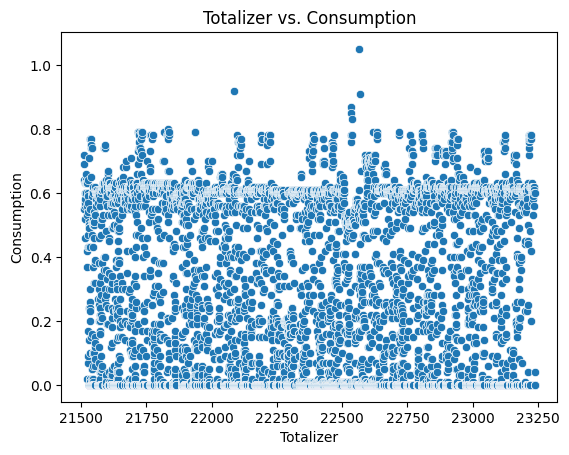

In [ ]:
sns.scatterplot(x='Totalizer', y='Consumption', data=df1)
plt.title('Totalizer vs. Consumption')
plt.xlabel('Totalizer')
plt.ylabel('Consumption')
plt.show()

Data points are distributed or fixed at range 21k to 23k

# **Totalizer Trends Over Time**

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Totalizer Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Totalizer')

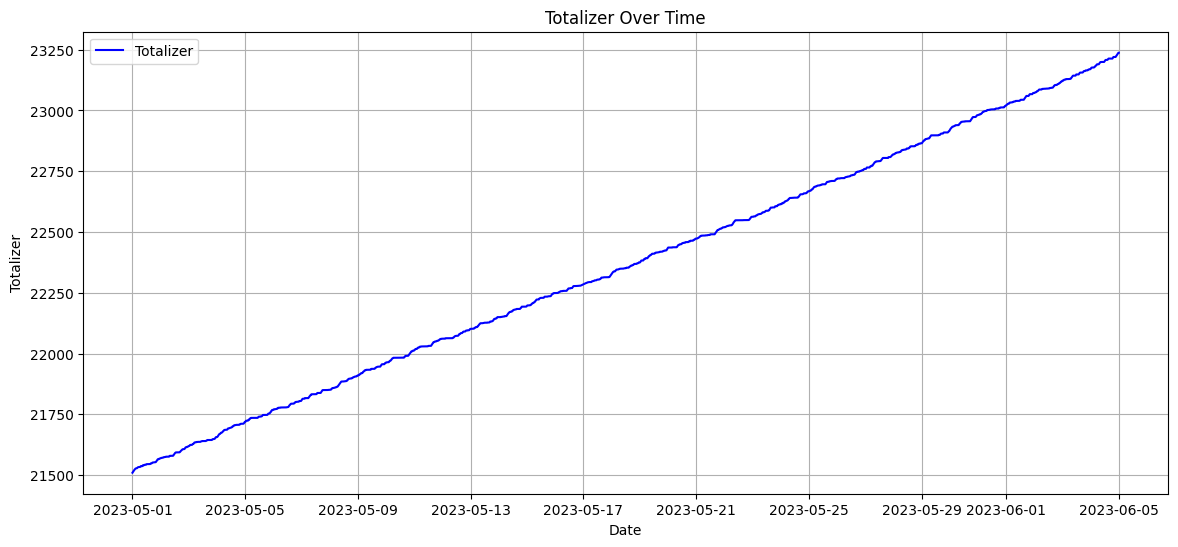

In [ ]:
# Time Series Plot for Totalizer
plt.figure(figsize=(14, 6))
plt.plot(df1['DateTime'], df1['Totalizer'], label='Totalizer', color='blue')
plt.title('Totalizer Over Time')
plt.xlabel('Date')
plt.ylabel('Totalizer')
plt.grid(True)
plt.legend()
plt.show()

# **Consumption Trends Over Time**

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Consumption Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Consumption')

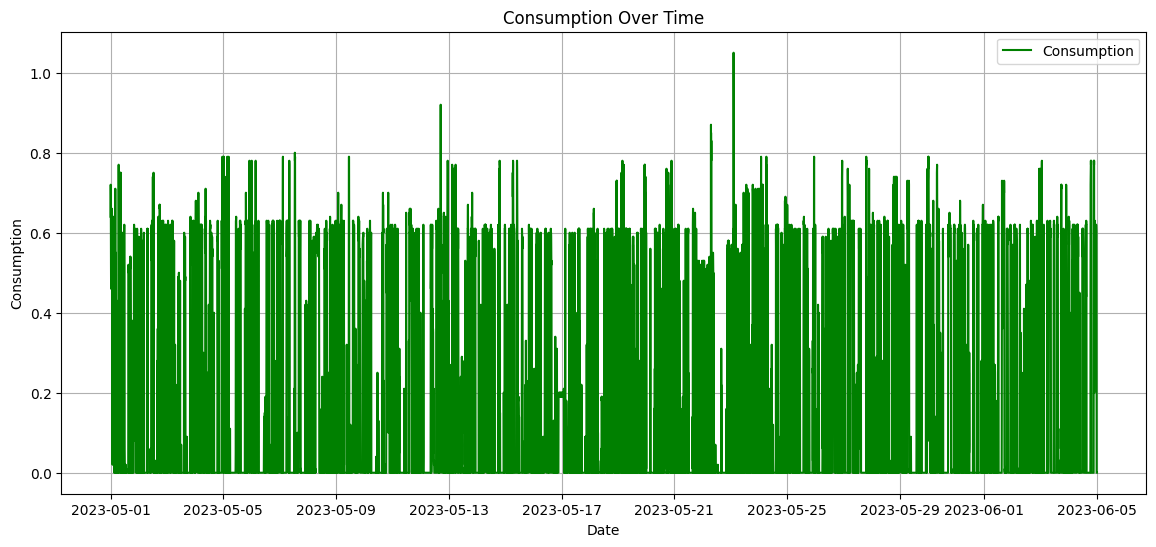

In [ ]:
# Time Series Plot for Consumption
plt.figure(figsize=(14, 6))
plt.plot(df1['DateTime'], df1['Consumption'], label='Consumption', color='green')
plt.title('Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()


# **Checking Outliers With Box Plot**

<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Consumption'>

Text(0.5, 1.0, 'Box Plot of Consumption')

Text(0.5, 0, 'Consumption')

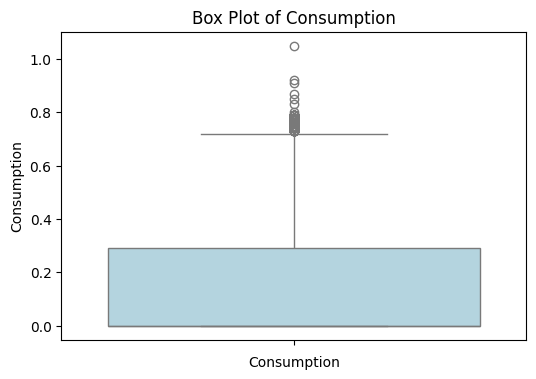

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(df1['Consumption'], color='lightblue')
plt.title('Box Plot of Consumption')
plt.xlabel('Consumption')
plt.show()


# **Plotting The Rolling Average**

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Consumption Over Time with Rolling Mean')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Consumption')

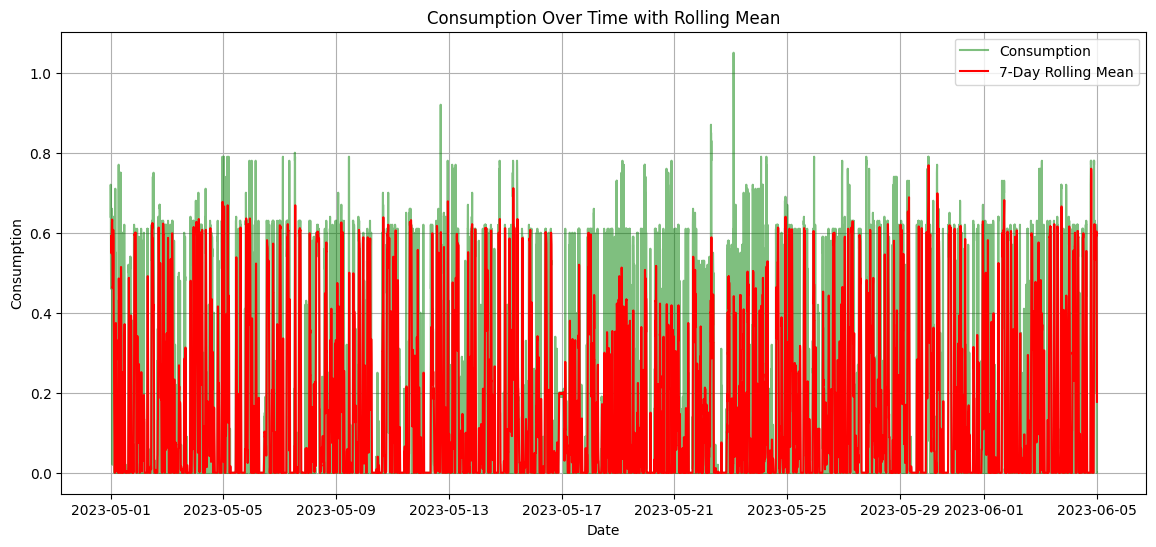

In [ ]:
# Calculate the rolling mean
df1['Rolling_Mean_Consumption'] = df1['Consumption'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(df1['DateTime'], df1['Consumption'], label='Consumption', color='green', alpha=0.5)
plt.plot(df1['DateTime'], df1['Rolling_Mean_Consumption'], label='7-Day Rolling Mean', color='red')
plt.title('Consumption Over Time with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()


# **Checking Relationship Hours and Days**

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='DateTime', ylabel='Hour'>

Text(0.5, 1.0, 'Average Hourly Consumption Over Days')

Text(0.5, 58.7222222222222, 'Date')

Text(120.72222222222221, 0.5, 'Hour of the Day')

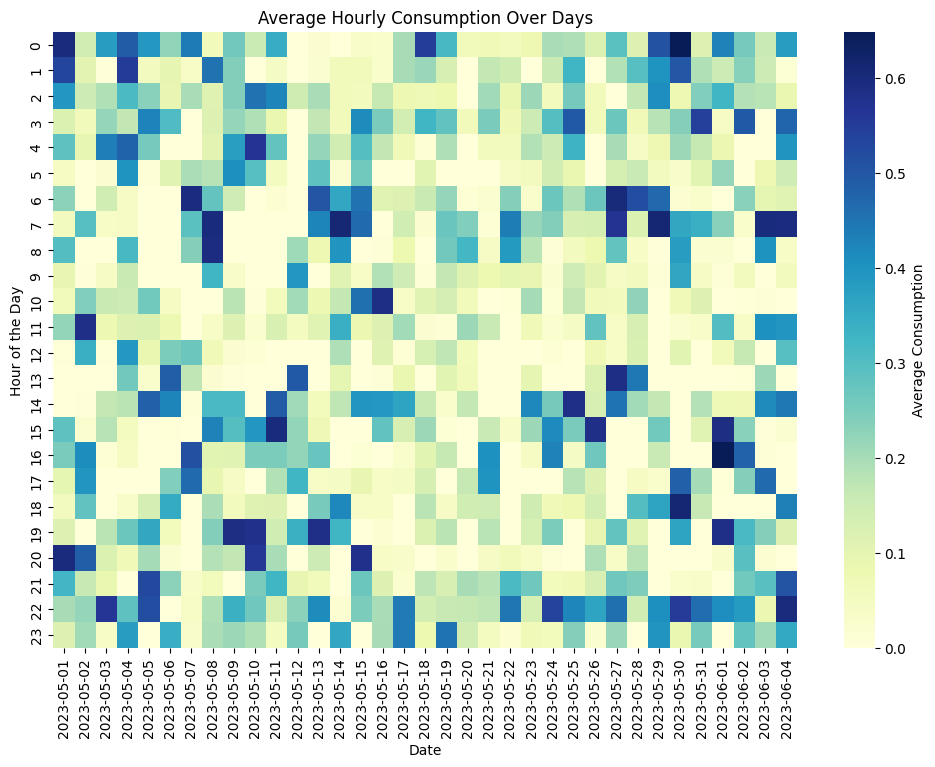

In [ ]:
# Extract hour from DateTime
df1['Hour'] = df1['DateTime'].dt.hour

# Pivot the data for heatmap
heatmap_data = df1.pivot_table(values='Consumption', index='Hour', columns=df1['DateTime'].dt.date, aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Average Consumption'})
plt.title('Average Hourly Consumption Over Days')
plt.xlabel('Date')
plt.ylabel('Hour of the Day')
plt.show()


<Figure size 1000x600 with 0 Axes>

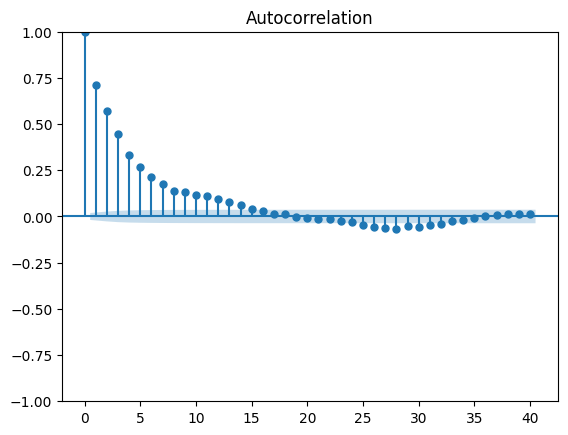

Text(0.5, 1.0, 'Autocorrelation Function (ACF) - Consumption')

<Figure size 1000x600 with 0 Axes>

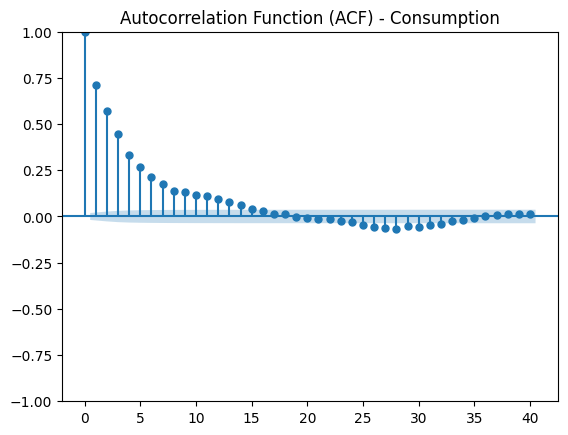

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF for Consumption
plt.figure(figsize=(10, 6))
plot_acf(df['Consumption'], lags=40)
plt.title('Autocorrelation Function (ACF) - Consumption')
plt.show()


<Figure size 1000x600 with 0 Axes>

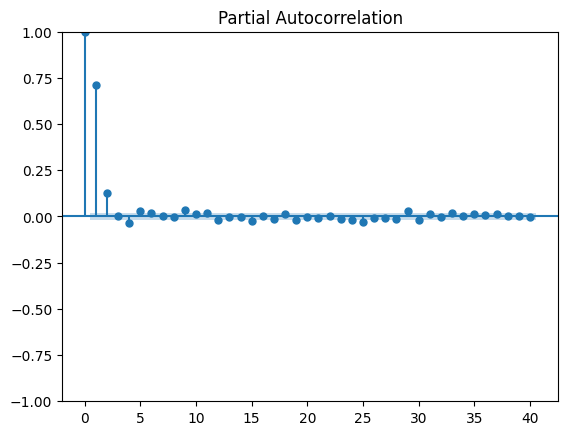

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) - Consumption')

<Figure size 1000x600 with 0 Axes>

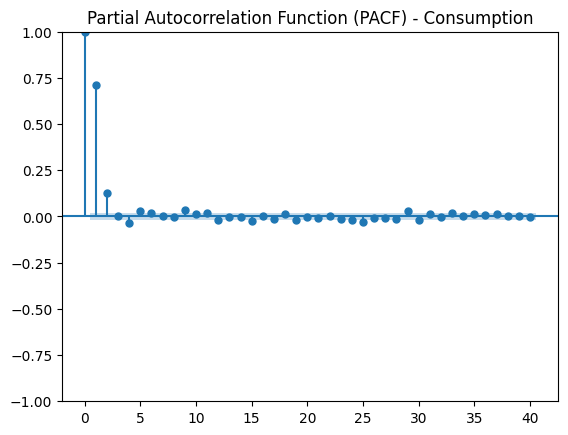

In [ ]:
# Plot PACF for Consumption
plt.figure(figsize=(10, 6))
plot_pacf(df['Consumption'], lags=40)
plt.title('Partial Autocorrelation Function (PACF) - Consumption')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

Text(0.5, 1.0, 'Lag Plot of Consumption')

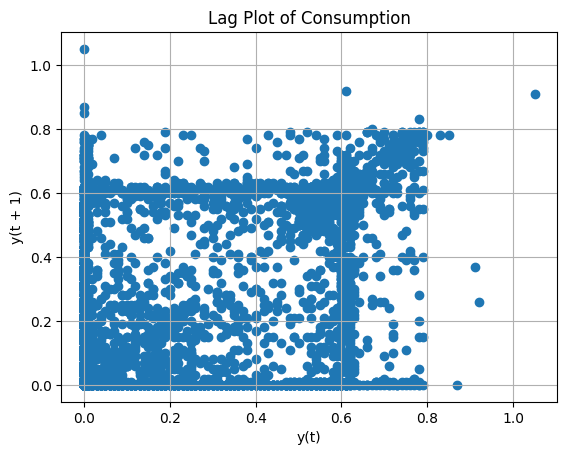

In [ ]:
pd.plotting.lag_plot(df['Consumption'])
plt.title('Lag Plot of Consumption')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

<ipython-input-34-6eff6e382b17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['Hour'], y=df1['Consumption'], palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a

<Axes: xlabel='Hour', ylabel='Consumption'>

Text(0.5, 1.0, 'Boxplot of Consumption by Hour of Day')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Consumption')

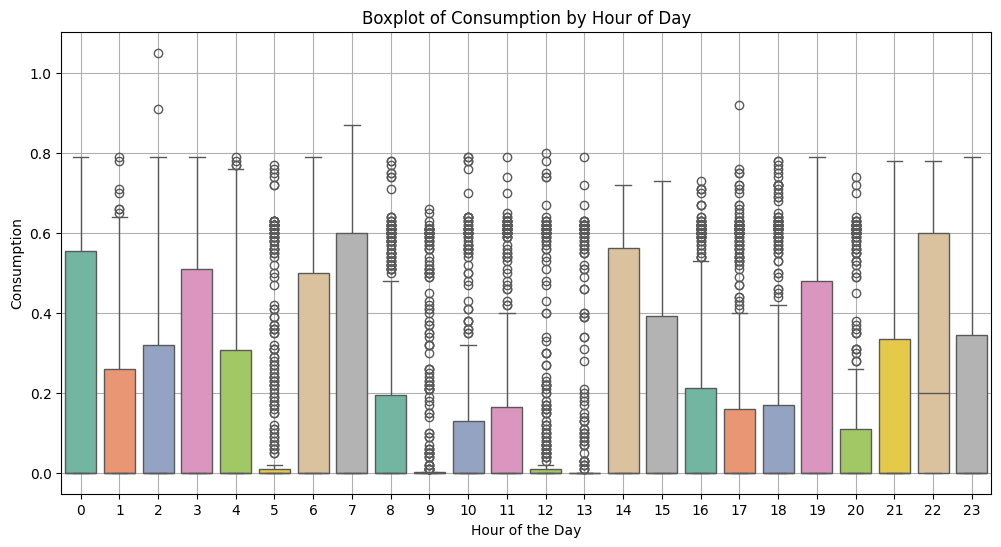

In [ ]:
# Boxplot of Consumption by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x=df1['Hour'], y=df1['Consumption'], palette='Set2')
plt.title('Boxplot of Consumption by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()


# **Decompsing The Consumption Column**

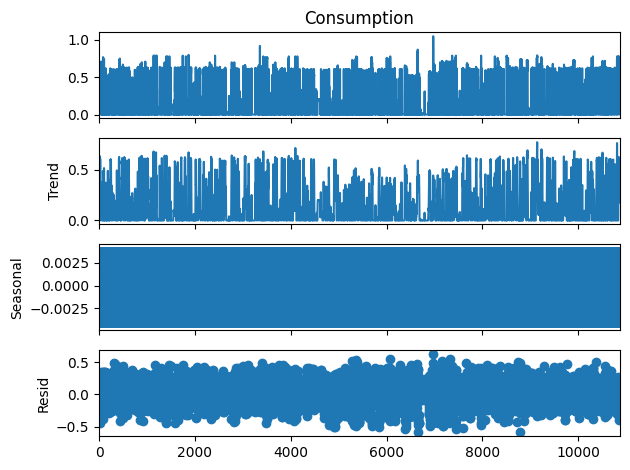

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Consumption' is the time series
result = seasonal_decompose(df1['Consumption'], model='additive', period=7)  # Set period based on data frequency
fig = result.plot()

plt.show()


# **Cumulative Trend of Cunsumption Over Time**

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Consumption Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Cumulative Consumption')

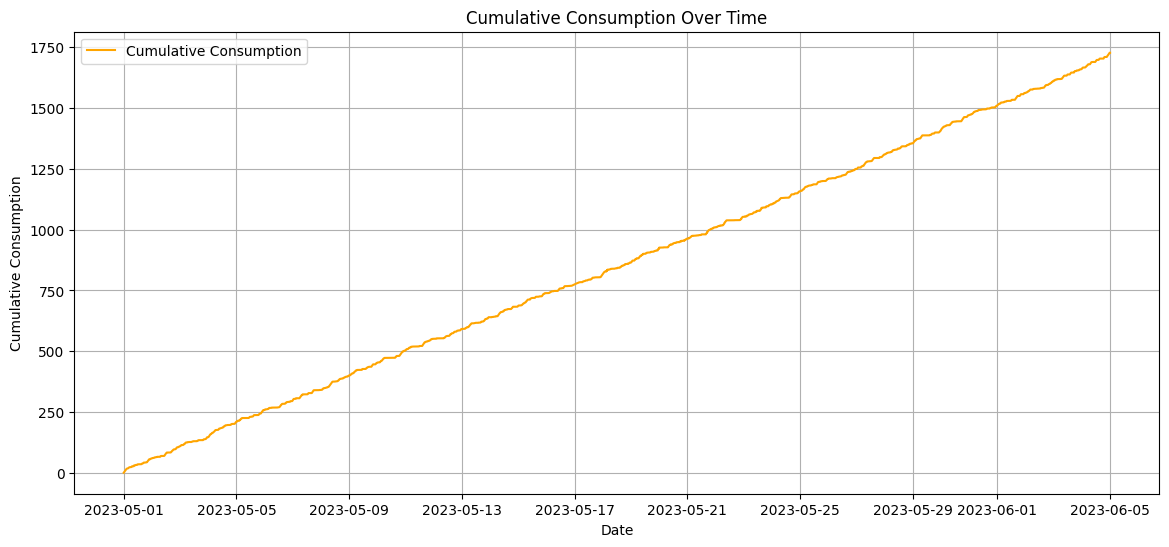

In [ ]:
df1['Cumulative_Consumption'] = df1['Consumption'].cumsum()

plt.figure(figsize=(14, 6))
plt.plot(df1['DateTime'], df1['Cumulative_Consumption'], label='Cumulative Consumption', color='orange')
plt.title('Cumulative Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Consumption')
plt.grid(True)
plt.legend()
plt.show()


This cumulative consumption graph provides a clear picture of how consumption is accumulating over time, showing steady and consistent usage. It is useful for long-term monitoring and can help identify trends and forecast future consumption

# **Plotting Distribution of Consumption**

<Figure size 800x600 with 0 Axes>

(array([7.146e+03, 2.320e+02, 1.870e+02, 3.070e+02, 2.220e+02, 1.270e+02,
        1.420e+02, 1.250e+02, 1.150e+02, 1.700e+02, 3.510e+02, 1.328e+03,
        1.900e+02, 1.030e+02, 1.030e+02, 1.900e+01, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.    , 0.0525, 0.105 , 0.1575, 0.21  , 0.2625, 0.315 , 0.3675,
        0.42  , 0.4725, 0.525 , 0.5775, 0.63  , 0.6825, 0.735 , 0.7875,
        0.84  , 0.8925, 0.945 , 0.9975, 1.05  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Consumption')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Consumption')

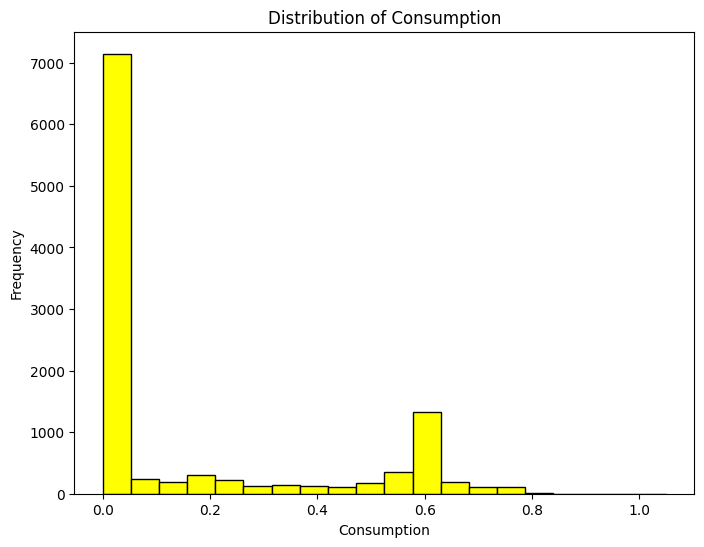

In [ ]:
# Plot the distribution of Consumption
plt.figure(figsize=(8, 6))
plt.hist(df1['Consumption'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption')
plt.show()

In [ ]:
df['Target'] = df['Consumption'].apply(lambda x: 1 if x > 0.60 else 0)

In [ ]:
df.head()

,Totalizer,Consumption,DateTime,Target
0,21510.05,0.64,2023-05-01 00:00:25,1
1,21510.69,0.72,2023-05-01 00:05:23,1
2,21511.41,0.69,2023-05-01 00:10:25,1
3,21512.10,0.55,2023-05-01 00:15:25,0
4,21512.65,0.52,2023-05-01 00:20:26,0


In [ ]:
df.Target.value_counts()

,count
Target,
0,9526
1,1346


# **KNN Model Without Labled Data**

In [ ]:
# Drop 'DateTime' column from features
X = df.drop(columns=['Target', 'DateTime'])  # Also drop the 'Status' column since we're doing unsupervised learning

# Continue with the same steps for train-test split and KNN model
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Initialize NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=12)

# Fit the model on the training data
knn_model.fit(X_train)

# Compute distances to k-nearest neighbors on the test set
distances, indices = knn_model.kneighbors(X_test)

# Calculate the mean distances and identify anomalies
mean_distances = np.mean(distances, axis=1)
threshold = np.percentile(mean_distances, 95)
anomalies = mean_distances > threshold

# Output anomaly indices and counts
anomaly_indices = np.where(anomalies)[0]
print("Anomalies found at indices:", anomaly_indices)
print("Number of anomalies:", np.sum(anomalies))


NearestNeighbors(n_neighbors=12)

Anomalies found at indices: [   8   13   29   66  121  128  160  192  200  207  214  215  221  222
  229  278  288  297  317  352  390  419  423  475  476  504  514  537
  556  563  592  648  652  685  712  741  778  808  850  855  856  880
  896  899  912  923  932  948  953  956  989 1020 1024 1026 1042 1054
 1100 1103 1110 1119 1212 1230 1232 1240 1249 1299 1310 1319 1320 1342
 1350 1396 1405 1441 1507 1519 1583 1600 1601 1613 1631 1662 1718 1757
 1782 1838 1867 1868 1877 1880 1881 1884 1889 1910 1921 1944 1960 1982
 1989 1997 2014 2018 2080 2095 2124 2129 2158 2172 2173]
Number of anomalies: 109


<Figure size 1000x600 with 0 Axes>

(array([189., 177., 215., 265., 172., 158., 143.,  94.,  99.,  62.,  65.,
         80.,  58.,  39.,  38.,  34.,  36.,  33.,  28.,  33.,  28.,  21.,
         17.,  22.,  11.,  14.,  10.,  11.,   6.,   6.,   3.,   1.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.        , 0.10474248, 0.20948496, 0.31422744, 0.41896992,
        0.5237124 , 0.62845488, 0.73319736, 0.83793985, 0.94268233,
        1.04742481, 1.15216729, 1.25690977, 1.36165225, 1.46639473,
        1.57113721, 1.67587969, 1.78062217, 1.88536465, 1.99010713,
        2.09484961, 2.19959209, 2.30433457, 2.40907706, 2.51381954,
        2.61856202, 2.7233045 , 2.82804698, 2.93278946, 3.03753194,
        3.14227442, 3.2470169 , 3.35175938, 3.45650186, 3.56124434,
        3.66598682, 3.7707293 , 3.87547179, 3.98021427, 4.08495675,
        4.18969923, 4.29444171, 4.39918419, 4.50392667, 4.60866915,
        4.71341163, 4.81815411, 4.92289659, 5.

Text(0.5, 1.0, 'Distribution of Mean Distances to Nearest Neighbors')

Text(0.5, 0, 'Mean Distance')

Text(0, 0.5, 'Frequency')

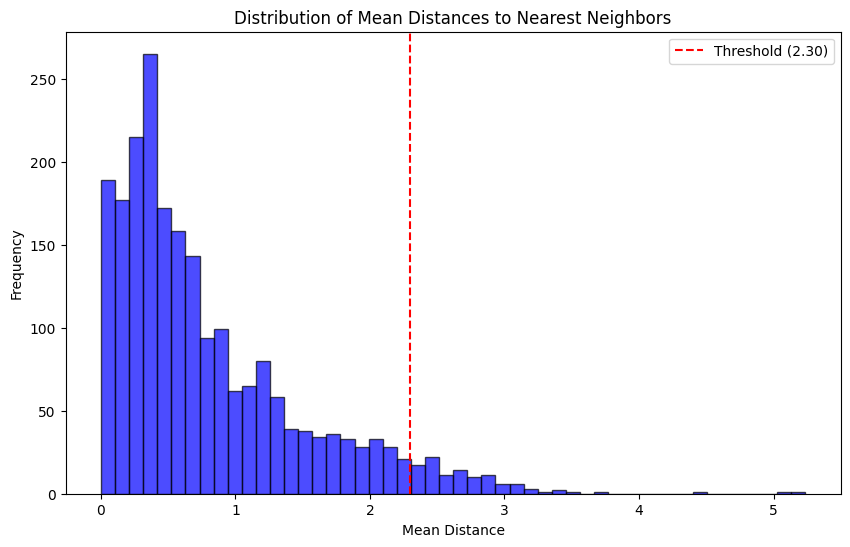

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'KNN Anomaly Detection - Mean Distance to Neighbors')

Text(0.5, 0, 'Data Point Index')

Text(0, 0.5, 'Mean Distance to Neighbors')

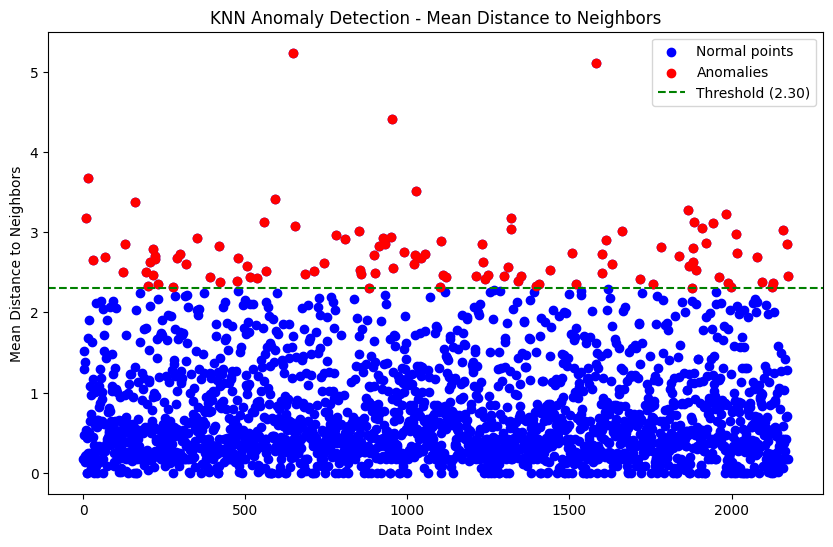

In [ ]:
# Plot the distribution of the mean distances
plt.figure(figsize=(10, 6))
plt.hist(mean_distances, bins=50, color='blue',edgecolor='black', alpha=0.7)
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('Distribution of Mean Distances to Nearest Neighbors')
plt.xlabel('Mean Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize anomalies vs. normal points
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mean_distances)), mean_distances, c='blue', label='Normal points')
plt.scatter(np.where(anomalies)[0], mean_distances[anomalies], c='red', label='Anomalies')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('KNN Anomaly Detection - Mean Distance to Neighbors')
plt.xlabel('Data Point Index')
plt.ylabel('Mean Distance to Neighbors')
plt.legend()
plt.show()

# **KNN Model With Labled Data**

In [ ]:
# Select features and target variable
X = df[['Totalizer', 'Consumption']]  # Features
y = df['Target']  # Target (Anomaly Label)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_test.head()

,Totalizer,Consumption
2754,21983.23,0.00
10208,23101.54,0.39
5155,22357.39,0.37
6187,22484.17,0.00
9530,23001.82,0.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model (we choose 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Accuracy 0.8979153893316983
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2849
           1       0.68      0.36      0.47       413

    accuracy                           0.90      3262
   macro avg       0.80      0.67      0.71      3262
weighted avg       0.88      0.90      0.88      3262



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

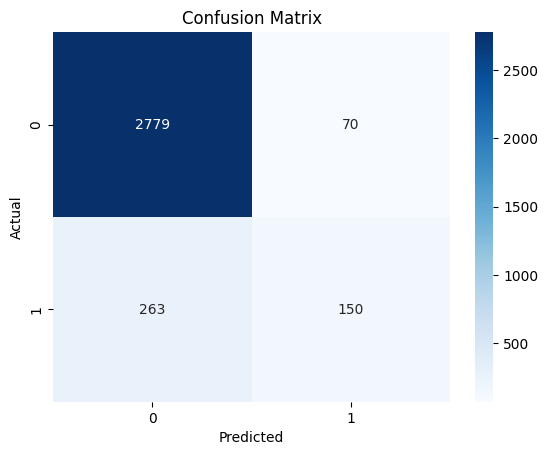

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the anomalies in the test set
y_pred = knn.predict(X_test)

# Print confusion matrix and classification report
print('Accuracy', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Score After Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the hyperparameters and their respective ranges to test
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 is Manhattan, p=2 is Euclidean
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

Best Hyperparameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

Accuracy 0.9218270999386879
[[2773   76]
 [ 179  234]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2849
           1       0.75      0.57      0.65       413

    accuracy                           0.92      3262
   macro avg       0.85      0.77      0.80      3262
weighted avg       0.92      0.92      0.92      3262



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

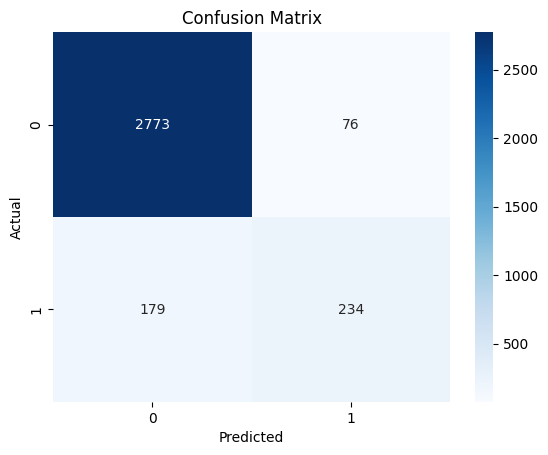

In [ ]:
# Train a new KNN model using the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                p=best_params['p'])

best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model performance with the optimized parameters
print("Accuracy", accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Score After Normalizing The Data**

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

Accuracy: 0.9855916615573268

[[2826   23]
 [  24  389]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2849
           1       0.94      0.94      0.94       413

    accuracy                           0.99      3262
   macro avg       0.97      0.97      0.97      3262
weighted avg       0.99      0.99      0.99      3262



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

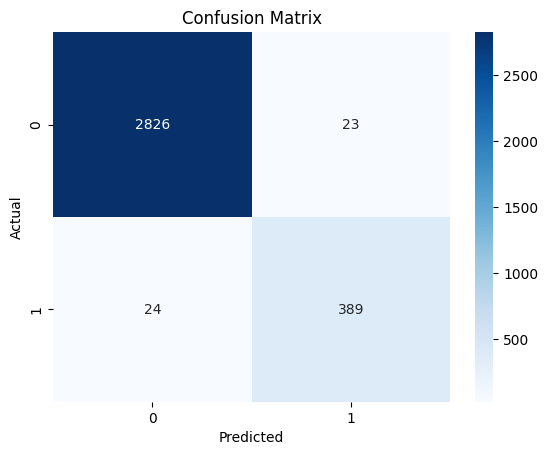

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Apply standard scaling to the features (Totalizer, Consumption)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing again
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Use the same best parameters from GridSearchCV but with scaled data
best_knn.fit(X_train_scaled, y_train)
y_pred_scaled = best_knn.predict(X_test_scaled)

# Evaluate the model again
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print()
print(confusion_matrix(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df_test= X_test.copy()
df_test['actual'] = y_test
df_test['Predicted'] = y_pred_scaled
df_test.head()

,Totalizer,Consumption,actual,Predicted
2754,21983.23,0.00,0,0
10208,23101.54,0.39,0,0
5155,22357.39,0.37,0,0
6187,22484.17,0.00,0,0
9530,23001.82,0.00,0,0


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Totalizer')

Text(0, 0.5, 'Consumption')

Text(0.5, 1.0, 'Actual vs Predicted Anomalies')

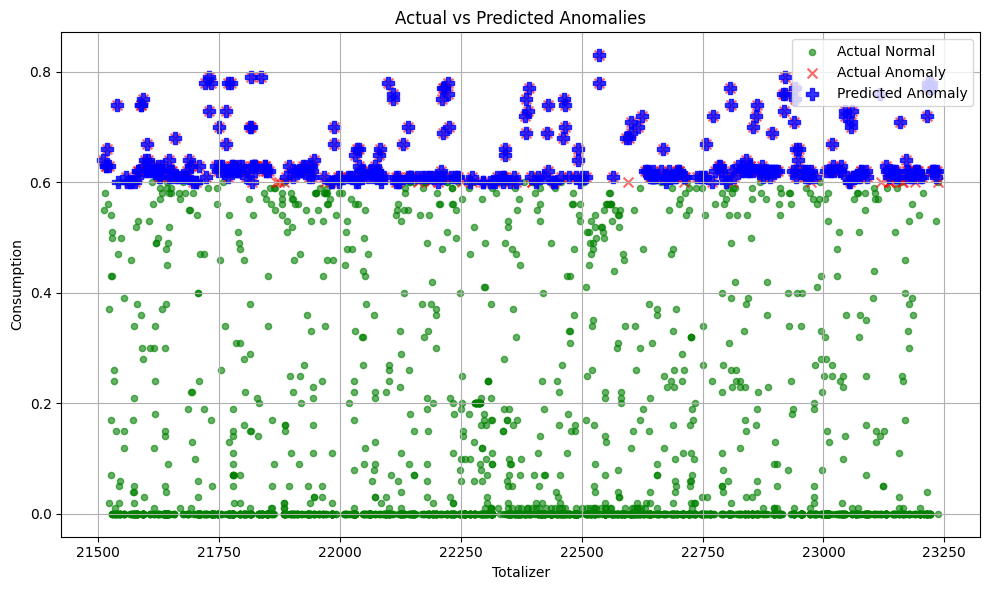

In [ ]:
# Separate data based on the actual and predicted values
actual_normal = df_test[(df_test['actual'] == 0)]
actual_anomaly = df_test[(df_test['actual'] == 1)]
predicted_anomaly = df_test[(df_test['Predicted'] == 1)]  # Predicted as anomaly but it's actually normal

# Plot the data
plt.figure(figsize=(10, 6))

# Plot actual normal data points
plt.scatter(actual_normal['Totalizer'], actual_normal['Consumption'],
            label='Actual Normal', color='green', alpha=0.6, s=20)

# Plot actual anomaly data points
plt.scatter(actual_anomaly['Totalizer'], actual_anomaly['Consumption'],
            label='Actual Anomaly', color='red', alpha=0.6, s=50, marker='x')

# Plot incorrectly predicted anomalies (false positives)
plt.scatter(predicted_anomaly['Totalizer'], predicted_anomaly['Consumption'],
            label='Predicted Anomaly', color='blue', alpha=0.8, s=70, marker='P')

# Add labels and legend
plt.xlabel('Totalizer')
plt.ylabel('Consumption')
plt.title('Actual vs Predicted Anomalies')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# **CNN Model With Labled Data**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# df['Year'] = df['DateTime'].dt.year
# df['Month'] = df['DateTime'].dt.month
# df['Day'] = df['DateTime'].dt.day
# df['Hour'] = df['DateTime'].dt.hour
# df['Minute'] = df['DateTime'].dt.minute
# df['Second'] = df['DateTime'].dt.second

# # Create lag features for labeled data
# lag_range = range(1, 6)
# for lag in lag_range:
#     df[f'Consumption_lag_{lag}'] = df['Consumption'].shift(lag)

# # Drop NaN values caused by shifting
# df.dropna(inplace=True)

# # Select features and target variable
# X = df.drop(columns=['Target', 'DateTime']) # Features
# y = df['Target']  # Target (Anomaly Label)


# from sklearn.model_selection import train_test_split

# # Split the data into 70% training and 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Reshape the data into a 3D array for CNN input
# Assuming you want to create sequences of 10 time steps for each sample
sequence_length = 10
X_sequences = []
y_sequences = []

for i in range(len(X_resampled) - sequence_length):
    X_sequences.append(X_resampled[i:i + sequence_length])
    y_sequences.append(y_resampled[i + sequence_length])  # Target is the label after the sequence

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build the CNN lll
lll = Sequential()
lll.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lll.add(MaxPooling1D(pool_size=2))
lll.add(Flatten())
lll.add(Dense(64, activation='relu'))
lll.add(Dropout(0.3))
lll.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the lll
lll.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the lll
lll.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the lll
loss, accuracy = lll.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5147 - loss: 463.2462 - val_accuracy: 0.4962 - val_loss: 0.6931
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5037 - loss: 0.7070 - val_accuracy: 0.4962 - val_loss: 0.6943
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5006 - loss: 0.6949 - val_accuracy: 0.5038 - val_loss: 0.6930
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5190 - loss: 0.6932 - val_accuracy: 0.4962 - val_loss: 0.6932
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5256 - loss: 0.6930 - val_accuracy: 0.5163 - val_loss: 0.6924
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5147 - loss: 0.6926 - val_accuracy: 0.4962 - val_loss: 0.6932
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.4962 - val_loss: 0.6932
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.4962 - va

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5046 - loss: 0.6931
Test Accuracy: 0.50
Test Loss: 0.69


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1907
           1       0.50      1.00      0.67      1899

    accuracy                           0.50      3806
   macro avg       0.25      0.50      0.33      3806
weighted avg       0.25      0.50      0.33      3806

[[   0 1907]
 [   0 1899]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 36.72222222222221, 'Predicted')

Text(0.5, 1.0, 'Confusion Matrix')

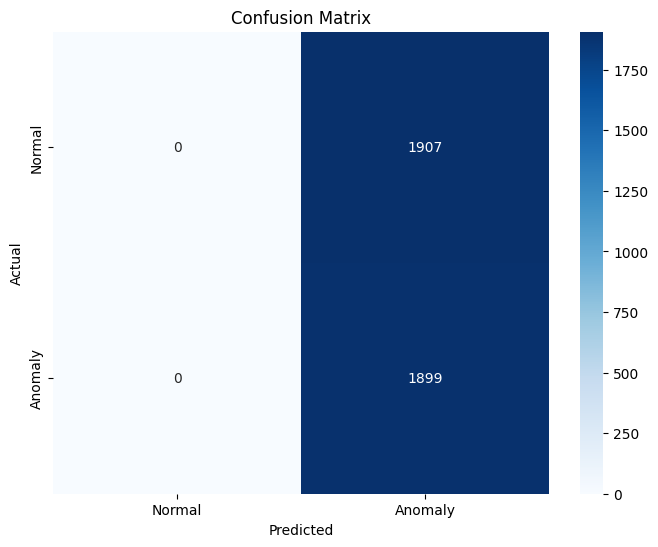

In [ ]:
# Generate predictions
y_pred = (lll.predict(X_test) > 0.5).astype("int32")

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **Score After Parameter Tuning**

In [ ]:
!pip install keras-tuner


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras import backend as K
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined and preprocessed accordingly

# Step 1: Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reshape the data into a 3D array for CNN input
sequence_length = 10
X_sequences = []
y_sequences = []

for i in range(len(X_resampled) - sequence_length):
    X_sequences.append(X_resampled[i:i + sequence_length])
    y_sequences.append(y_resampled[i + sequence_length])  # Target is the label after the sequence

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Step 3: Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=64, step=16),
                     kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
                     activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=hp.Int('pool_size', min_value=2, max_value=3)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Use Keras Tuner for hyperparameter tuning
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=1,
                     directory='my_dir',
                     project_name='helloworld')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Step 5: Train the best model
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


Reloading Tuner from my_dir/helloworld/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9258 - loss: 0.2245
Test Accuracy: 0.93
Test Loss: 0.22


<Figure size 1400x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Model Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

<Axes: >

Text(0.5, 1.0, 'Model Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

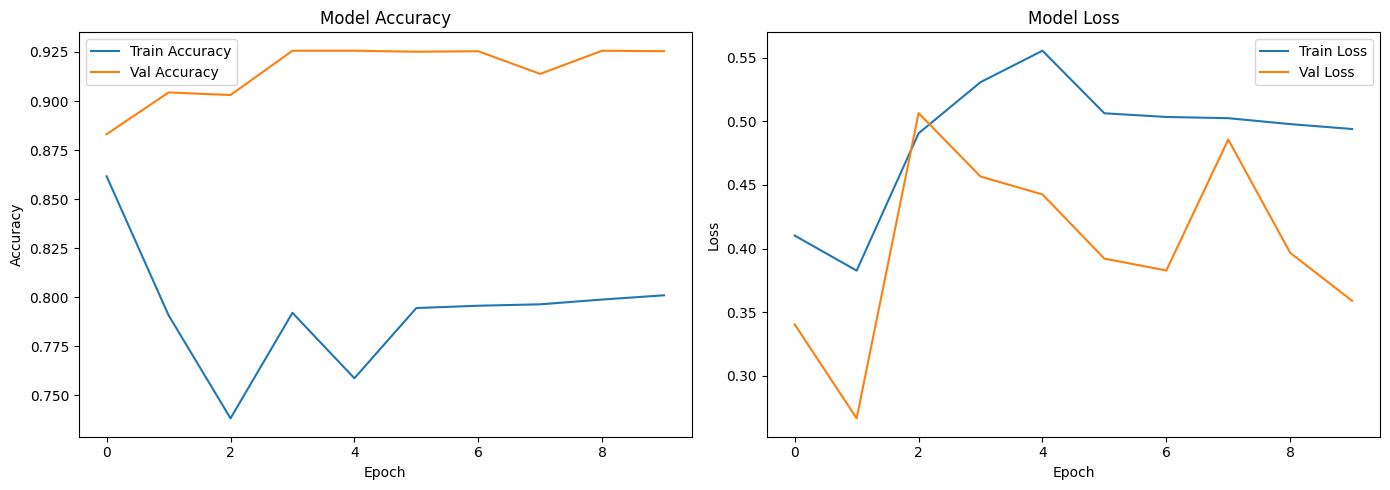

In [ ]:
# Step 6: Evaluate the model visually
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1907
           1       1.00      0.85      0.92      1899

    accuracy                           0.93      3806
   macro avg       0.94      0.93      0.92      3806
weighted avg       0.94      0.93      0.92      3806

[[1907    0]
 [ 284 1615]]


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 36.72222222222221, 'Predicted')

Text(0.5, 1.0, 'Confusion Matrix')

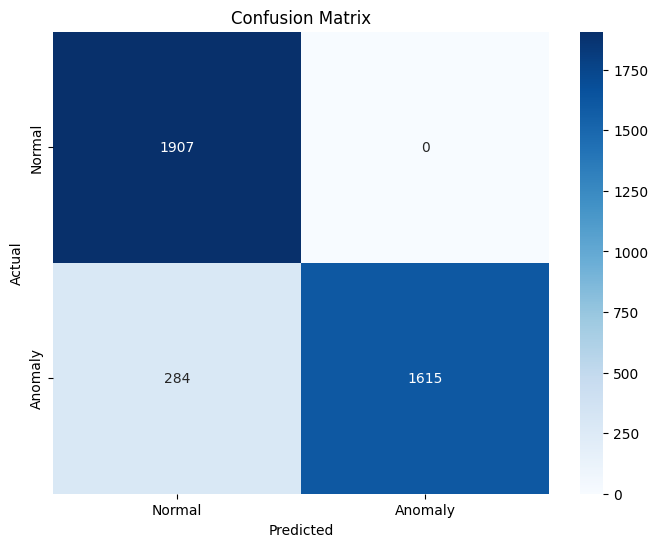

In [ ]:
# Generate predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()